In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Capstone-1\May\Data\AfterEDA.csv')

df.head(5)
#df.shape


,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
# Convert date sold to just year_sold
df['year_sold'] = pd.to_datetime(df['date_sold']).dt.year.astype(int)
df = df.drop(columns=['date_sold'], axis =1)

C:\Users\viksaraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


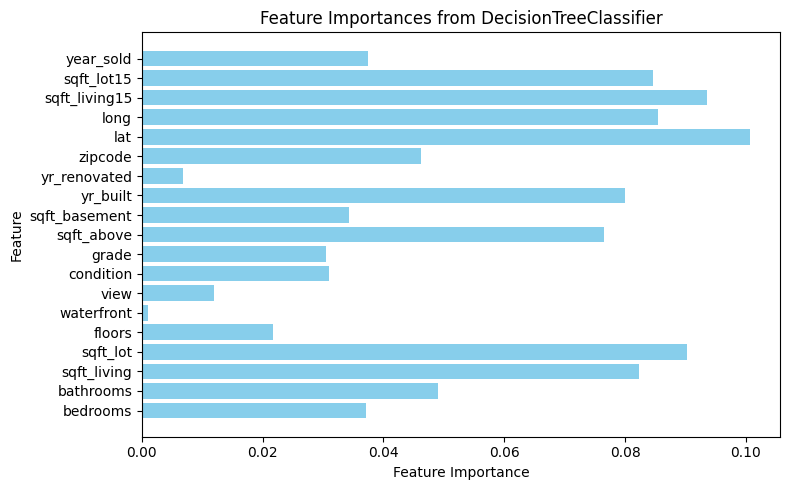

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# Split into features and target
X = df.drop('price', axis=1)
y = df['price']

# Train DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Feature selection
selector = SelectFromModel(clf, prefit=True)
X_new = selector.transform(X)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DecisionTreeClassifier')
plt.tight_layout()
plt.show()